<a href="https://colab.research.google.com/github/MocktaiLEngineer/PyNN-Less/blob/main/BigramLanguageModel_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
# Get the names.txt file
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-02-16 15:00:23--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-02-16 15:00:23 (8.70 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
words = open('names.txt','r').read().splitlines()

In [ ]:
TOKEN = '.'
vocab = [TOKEN] + sorted(list(set(''.join(words)))) 

In [ ]:
n = len(vocab)

In [ ]:
char_to_int = {char:i for i,char in enumerate(vocab)}
int_to_char = {i:char for char,i in char_to_int.items()}

In [ ]:
# Prepare the dataset of bigrams (x,y)

X,Y = [],[]

for word in words:
    word = [TOKEN] + list(word) + [TOKEN]
    for ch1,ch2 in zip(word,word[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        X.append(ix1)
        Y.append(ix2)

X = torch.tensor(X)
Y = torch.tensor(Y)

# Initialising the network
g = torch.Generator().manual_seed(2147483647) # for reproducibility
W = torch.randn((n,n), requires_grad = True, generator=g)
num = X.nelement()

In [ ]:
for i in range(200):
    # Forward pass
    xenc = F.one_hot(X, num_classes = n).float()
    logits = xenc @ W #Log counts
    counts = logits.exp()
    probs = counts / torch.sum(counts, dim = 1, keepdim = True)
    loss = -probs[torch.arange(num), Y].log().mean() 

    # Backward pass
    W.grad = None
    loss.backward()

    # Update parameters
    W.data += -50 * W.grad

print(f'{loss=}')

loss=tensor(2.4578, grad_fn=<NegBackward0>)


In [ ]:
# Let's sample and generate
g = torch.Generator().manual_seed(2147483647) # for reproducibility

for i in range(10):
  name = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes = n).float()
    logits = xenc @ W #Log counts
    counts = logits.exp()
    probs = counts / torch.sum(counts, dim = 1, keepdim = True)
    ix = torch.multinomial(probs, num_samples = 1, replacement = True, generator = g).item()
    name.append(int_to_char[ix])
    if ix == 0:
      break
  print(''.join(name))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushk.


In [ ]:
P = W.exp() 
P /= P.sum(1, keepdim = True)

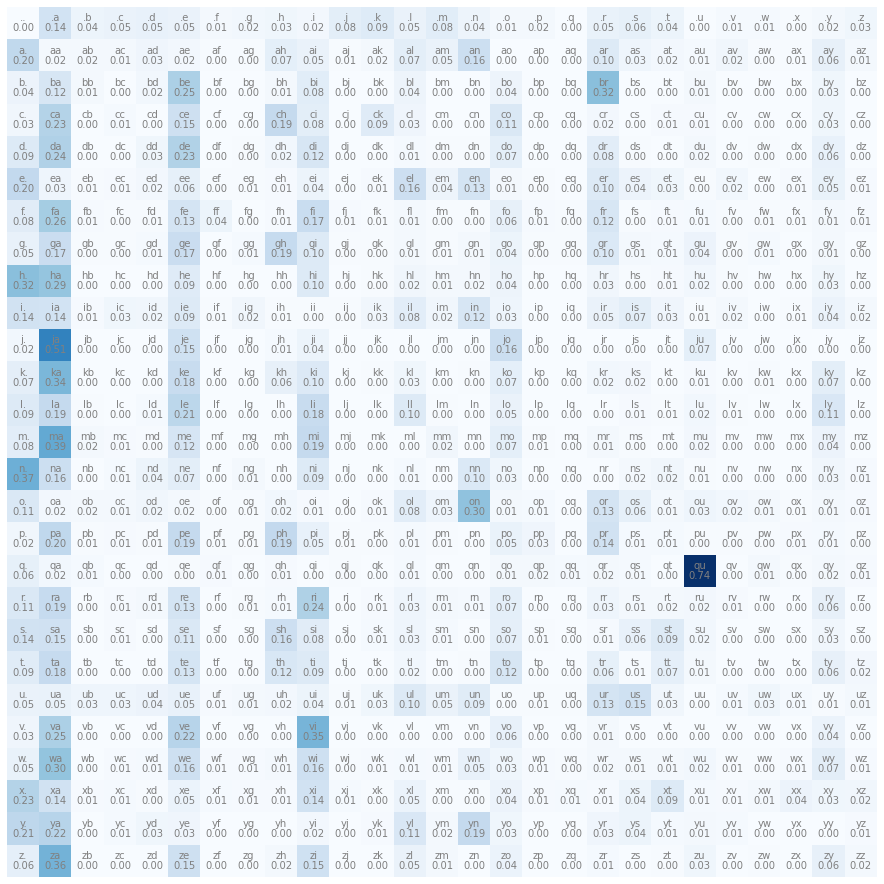

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

with torch.no_grad():
    plt.figure(figsize=(16,16))
    plt.imshow(P, cmap='Blues')
    for i in range(n):
        for j in range(n):
            chstr = int_to_char[i] + int_to_char[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
            plt.text(j, i, '{0:.2f}'.format(P[i, j].item()), ha="center", va="top", color='gray')
    plt.axis('off');